# Key Input Technique Study
### Author: Sarah

## Structured Analysis
### Import all relevant libraries

In [25]:
!pip3 install pingouin

In [26]:
import pandas as pd
import pingouin as pg
import seaborn as sns
from matplotlib import pyplot as plt

### Read csv file

In [36]:
raw_data_test_auto_complete = pd.read_csv("./test_auto_complete.csv", sep=';', engine='python')
raw_data_test_normal = pd.read_csv("./test_normal.csv", sep=';', engine='python')

### Combine the individual tables of the participants and save them

In [37]:
normal_input_technique = pd.concat([
    raw_data_test_normal
])

novel_input_technique = pd.concat([
    raw_data_test_auto_complete
])

normal_input_technique.to_csv("normal_input_technique_table.csv", index=False)
normal_input_technique.to_csv("novel_input_technique_table.csv", index=False)

In [38]:
normal_input_technique

,log_type,participant_id,keyboard_type,txt_file,key_limit,key_code,key_value,content,timestamp,word_time_in_s,sentence_time_in_s,words_per_minute
0,key_pressed,1,normal,wahrheit.txt,3,87,W,W,2021-05-17 15:09:14.541240,NaN,NaN,18237.082067
1,key_pressed,1,normal,wahrheit.txt,3,65,a,Wa,2021-05-17 15:09:14.767454,NaN,NaN,105.842973
2,key_pressed,1,normal,wahrheit.txt,3,72,h,Wah,2021-05-17 15:09:15.739909,NaN,NaN,30.019688
3,sentence_finished,1,normal,wahrheit.txt,3,16777220,<RETURN>,Wahrheit,2021-05-17 15:09:17.028012,2.486877,2.486902,38.596146
4,key_pressed,1,normal,wahrheit.txt,3,86,v,v,2021-05-17 15:09:17.532670,NaN,NaN,36.096775
...,...,...,...,...,...,...,...,...,...,...,...,...
133,word_finished,1,normal,wahrheit.txt,3,32,,Wenn es die Liebe nicht,2021-05-17 15:10:17.763729,0.799777,NaN,25.243971
134,key_pressed,1,normal,wahrheit.txt,3,86,v,Wenn es die Liebe nicht v,2021-05-17 15:10:18.435955,NaN,NaN,25.166193
135,key_pressed,1,normal,wahrheit.txt,3,69,e,Wenn es die Liebe nicht ve,2021-05-17 15:10:18.569641,NaN,NaN,25.301061
136,key_pressed,1,normal,wahrheit.txt,3,82,r,Wenn es die Liebe nicht ver,2021-05-17 15:10:18.747764,NaN,NaN,25.417766


In [39]:
novel_input_technique

,log_type,participant_id,keyboard_type,txt_file,key_limit,key_code,key_value,content,timestamp,word_time_in_s,sentence_time_in_s,words_per_minute
0,key_pressed,1,auto_complete,wahrheit.txt,3,87,W,W,2021-05-17 15:09:14.541240,NaN,NaN,18237.082067
1,key_pressed,1,auto_complete,wahrheit.txt,3,65,a,Wa,2021-05-17 15:09:14.767454,NaN,NaN,105.842973
2,key_pressed,1,auto_complete,wahrheit.txt,3,72,h,Wah,2021-05-17 15:09:15.739909,NaN,NaN,30.019688
3,sentence_finished,1,auto_complete,wahrheit.txt,3,16777220,<RETURN>,Wahrheit,2021-05-17 15:09:17.028012,2.486877,2.486902,38.596146
4,key_pressed,1,auto_complete,wahrheit.txt,3,86,v,v,2021-05-17 15:09:17.532670,NaN,NaN,36.096775
...,...,...,...,...,...,...,...,...,...,...,...,...
133,word_finished,1,auto_complete,wahrheit.txt,3,32,,Wenn es die Liebe nicht,2021-05-17 15:10:17.763729,0.799777,NaN,25.243971
134,key_pressed,1,auto_complete,wahrheit.txt,3,86,v,Wenn es die Liebe nicht v,2021-05-17 15:10:18.435955,NaN,NaN,25.166193
135,key_pressed,1,auto_complete,wahrheit.txt,3,69,e,Wenn es die Liebe nicht ve,2021-05-17 15:10:18.569641,NaN,NaN,25.301061
136,key_pressed,1,auto_complete,wahrheit.txt,3,82,r,Wenn es die Liebe nicht ver,2021-05-17 15:10:18.747764,NaN,NaN,25.417766


In [41]:
# whole data set
input_technique_table = pd.concat([
    normal_input_technique,
    novel_input_technique
])

input_technique_table

,log_type,participant_id,keyboard_type,txt_file,key_limit,key_code,key_value,content,timestamp,word_time_in_s,sentence_time_in_s,words_per_minute
0,key_pressed,1,normal,wahrheit.txt,3,87,W,W,2021-05-17 15:09:14.541240,NaN,NaN,18237.082067
1,key_pressed,1,normal,wahrheit.txt,3,65,a,Wa,2021-05-17 15:09:14.767454,NaN,NaN,105.842973
2,key_pressed,1,normal,wahrheit.txt,3,72,h,Wah,2021-05-17 15:09:15.739909,NaN,NaN,30.019688
3,sentence_finished,1,normal,wahrheit.txt,3,16777220,<RETURN>,Wahrheit,2021-05-17 15:09:17.028012,2.486877,2.486902,38.596146
4,key_pressed,1,normal,wahrheit.txt,3,86,v,v,2021-05-17 15:09:17.532670,NaN,NaN,36.096775
...,...,...,...,...,...,...,...,...,...,...,...,...
133,word_finished,1,auto_complete,wahrheit.txt,3,32,,Wenn es die Liebe nicht,2021-05-17 15:10:17.763729,0.799777,NaN,25.243971
134,key_pressed,1,auto_complete,wahrheit.txt,3,86,v,Wenn es die Liebe nicht v,2021-05-17 15:10:18.435955,NaN,NaN,25.166193
135,key_pressed,1,auto_complete,wahrheit.txt,3,69,e,Wenn es die Liebe nicht ve,2021-05-17 15:10:18.569641,NaN,NaN,25.301061
136,key_pressed,1,auto_complete,wahrheit.txt,3,82,r,Wenn es die Liebe nicht ver,2021-05-17 15:10:18.747764,NaN,NaN,25.417766


### Filter the data with relevant columns for analysis of task completion time and save the result

In [42]:
filtered_data = input_technique_table[
    ["log_type", "participant_id", "keyboard_type", "content", "sentence_time_in_s", "words_per_minute"]]

filtered_data.to_csv("filtered_data.csv", index=False)

filtered_data

,log_type,participant_id,keyboard_type,content,sentence_time_in_s,words_per_minute
0,key_pressed,1,normal,W,NaN,18237.082067
1,key_pressed,1,normal,Wa,NaN,105.842973
2,key_pressed,1,normal,Wah,NaN,30.019688
3,sentence_finished,1,normal,Wahrheit,2.486902,38.596146
4,key_pressed,1,normal,v,NaN,36.096775
...,...,...,...,...,...,...
133,word_finished,1,auto_complete,Wenn es die Liebe nicht,NaN,25.243971
134,key_pressed,1,auto_complete,Wenn es die Liebe nicht v,NaN,25.166193
135,key_pressed,1,auto_complete,Wenn es die Liebe nicht ve,NaN,25.301061
136,key_pressed,1,auto_complete,Wenn es die Liebe nicht ver,NaN,25.417766


In [43]:
words_per_minute = filtered_data[filtered_data["log_type"] == "test_finished"]
words_per_minute = words_per_minute[["log_type", "participant_id", "keyboard_type", "content", "words_per_minute"]]
words_per_minute

,log_type,participant_id,keyboard_type,content,words_per_minute
137,test_finished,1,normal,Wenn es die Liebe nicht vereint.,25.715541
137,test_finished,1,auto_complete,Wenn es die Liebe nicht vereint.,25.715541


In [44]:
time_per_sentence = filtered_data[(filtered_data["log_type"] == "sentence_finished") 
                                  | (filtered_data["log_type"] == "test_finished")]
time_per_sentence = time_per_sentence[["log_type", "participant_id", "keyboard_type", "content", "sentence_time_in_s"]]
time_per_sentence

,log_type,participant_id,keyboard_type,content,sentence_time_in_s
3,sentence_finished,1,normal,Wahrheit,2.486902
28,sentence_finished,1,normal,von Johann Wolfgang von Goethe,11.503311
29,sentence_finished,1,normal,von Johann Wolfgang von Goethe,NaN
52,sentence_finished,1,normal,Was auch als Wahrheit od,9.648267
59,sentence_finished,1,normal,Was auch als Wahrheit oder Fabel,3.429240
74,sentence_finished,1,normal,In tausend Büchern die,8.768425
84,sentence_finished,1,normal,"In tausend Büchern dir erscheint,",3.649386
111,sentence_finished,1,normal,"Das alles ist ein Turm zu Babel,",10.537847
137,test_finished,1,normal,Wenn es die Liebe nicht vereint.,10.419016
3,sentence_finished,1,auto_complete,Wahrheit,2.486902


## Statistics for all tables

In [45]:
input_technique_table.describe()  # total

,participant_id,key_limit,key_code,word_time_in_s,sentence_time_in_s,words_per_minute
count,276.0,276.0,2.760000e+02,68.000000,34.000000,258.000000
mean,1.0,3.0,2.188391e+06,1.302393,16.655733,167.841209
std,0.0,0.0,5.660493e+06,0.640077,9.104597,1600.231885
min,1.0,3.0,3.200000e+01,0.464039,2.486902,21.724039
25%,1.0,3.0,6.500000e+01,0.696375,9.648267,24.971483
50%,1.0,3.0,7.300000e+01,1.296333,21.900758,25.336963
75%,1.0,3.0,8.400000e+01,1.721270,24.540254,27.238329
max,1.0,3.0,1.677722e+07,3.298474,27.083540,18237.082067


In [46]:
normal_input_technique.describe()  # normal input technique

,participant_id,key_limit,key_code,word_time_in_s,sentence_time_in_s,words_per_minute
count,138.0,138.0,1.380000e+02,34.000000,17.000000,129.000000
mean,1.0,3.0,2.188391e+06,1.302393,16.655733,167.841209
std,0.0,0.0,5.670813e+06,0.644908,9.245762,1603.354292
min,1.0,3.0,3.200000e+01,0.464039,2.486902,21.724039
25%,1.0,3.0,6.500000e+01,0.698335,9.648267,24.971483
50%,1.0,3.0,7.300000e+01,1.296333,21.900758,25.336963
75%,1.0,3.0,8.375000e+01,1.689052,24.540254,27.238329
max,1.0,3.0,1.677722e+07,3.298474,27.083540,18237.082067


In [48]:
novel_input_technique.describe()  # novel input technique

,participant_id,key_limit,key_code,word_time_in_s,sentence_time_in_s,words_per_minute
count,138.0,138.0,1.380000e+02,34.000000,17.000000,129.000000
mean,1.0,3.0,2.188391e+06,1.302393,16.655733,167.841209
std,0.0,0.0,5.670813e+06,0.644908,9.245762,1603.354292
min,1.0,3.0,3.200000e+01,0.464039,2.486902,21.724039
25%,1.0,3.0,6.500000e+01,0.698335,9.648267,24.971483
50%,1.0,3.0,7.300000e+01,1.296333,21.900758,25.336963
75%,1.0,3.0,8.375000e+01,1.689052,24.540254,27.238329
max,1.0,3.0,1.677722e+07,3.298474,27.083540,18237.082067


## Visualizations

### Scatter plots for task completion time

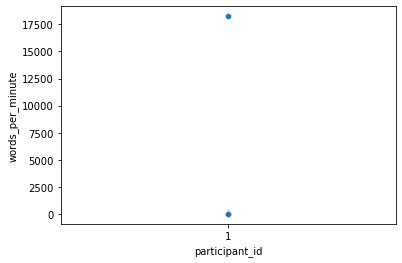

In [50]:
scatter_plot_ids = sns.scatterplot(
    data = input_technique_table,
    x = "participant_id",
    y = "words_per_minute",
)
scatter_plot_ids.set(xlabel = "participant_id", ylabel = "words_per_minute", xticks = [1])
plt.show()

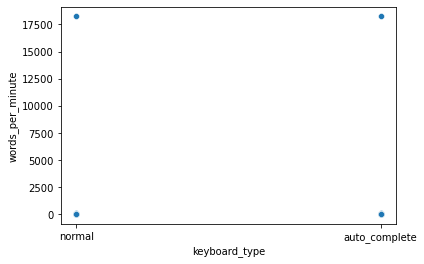

In [51]:
scatter_plot_con = sns.scatterplot(
    data = input_technique_table,
    x = "keyboard_type",
    y = "words_per_minute",
)
scatter_plot_con.set(xlabel = "keyboard_type", ylabel = "words_per_minute")
plt.show()

### Swarm plots for task completion time

/home/sarah/.local/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 55.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


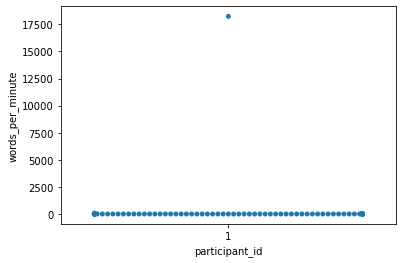

In [53]:
swarm_plot_con_normal = sns.swarmplot(
    data = input_technique_table[input_technique_table["keyboard_type"] == "normal"],
    y = "words_per_minute",
    x = "participant_id",
) 
swarm_plot_con_normal.set(xlabel = "participant_id", ylabel = "words_per_minute")

plt.show()

/home/sarah/.local/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 55.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


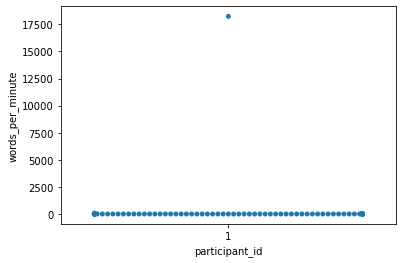

In [54]:
swarm_plot_con_novel = sns.swarmplot(
    data = input_technique_table[input_technique_table["keyboard_type"] == "auto_complete"],
    y = "words_per_minute",
    x = "participant_id",
) 
swarm_plot_con_normal.set(xlabel = "participant_id", ylabel = "words_per_minute")

plt.show()

/home/sarah/.local/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 74.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


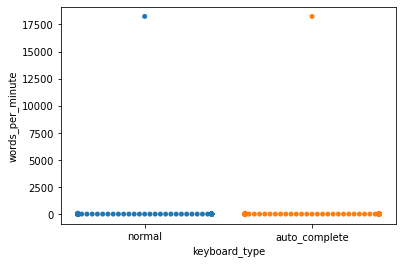

In [55]:
swarm_plot_pointer = sns.swarmplot(
    data = input_technique_table,
    y = "words_per_minute",
    x = "keyboard_type",
)
swarm_plot_pointer.set(xlabel = "keyboard_type", ylabel = "words_per_minute")

plt.show()

### Boxplots for task completion time

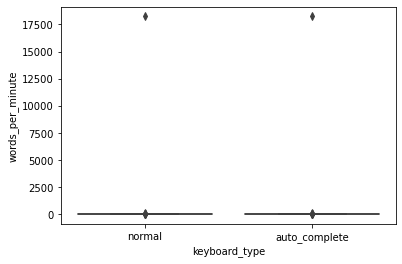

In [56]:
box_plot_con = sns.boxplot(
    data = input_technique_table,
    x = "keyboard_type",
    y = "words_per_minute"
)

box_plot_con.set(xlabel = "keyboard_type", ylabel = "words_per_minute")

plt.show()

## T-test

__Tests for variance homogeneity and normal distribution__

In [57]:
pg.homoscedasticity(data = input_technique_table, dv = "words_per_minute", group = "keyboard_type", method = "bartlett")

,T,pval,equal_var
bartlett,NaN,NaN,False


In [58]:
pg.normality(data = input_technique_table, dv = "words_per_minute", group = "keyboard_type")

,W,pval,normal
normal,0.062984,5.203960e-25,False
auto_complete,0.062984,5.203960e-25,False


In [59]:
pg.homoscedasticity(data = input_technique_table, dv = "sentence_time_in_s", group = "keyboard_type", method = "bartlett")

,T,pval,equal_var
bartlett,NaN,NaN,False


In [60]:
pg.normality(data = input_technique_table, dv = "sentence_time_in_s", group = "keyboard_type")

,W,pval,normal
normal,0.835946,0.006595,False
auto_complete,0.835946,0.006595,False


No normal distribution for all, therefore use of Welch-Anova test

In [61]:
pg.welch_anova(data = input_technique_table, dv = "words_per_minute", between = "keyboard_type")

,Source,ddof1,ddof2,F,p-unc,np2
0,keyboard_type,1,256.0,8.107017e-32,1.0,7.917009e-33


In [62]:
pg.welch_anova(data = input_technique_table, dv = "sentence_time_in_s", between = "keyboard_type")

,Source,ddof1,ddof2,F,p-unc,np2
0,keyboard_type,1,32.0,0.0,1.0,1.568787e-31
